<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание-*" data-toc-modified-id="Задание-*-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание *</a></span><ul class="toc-item"><li><span><a href="#Список-объектов" data-toc-modified-id="Список-объектов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Список объектов</a></span></li></ul></li><li><span><a href="#Данные-по-определенному-объекту" data-toc-modified-id="Данные-по-определенному-объекту-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Данные по определенному объекту</a></span></li></ul></div>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task1_dmrf.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [1]:
import requests
from tqdm.auto import tqdm

## Список объектов

In [2]:
# Для скачивания данных

def get_objects_data(offset_, limit_):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    return res.json()

In [3]:
offset_ = 0
limit_ = 1000
objects_data = get_objects_data(offset_, limit_)
objects_data.get('data').get('list')[0]

{'objId': 29679,
 'developer': {'devId': 7424,
  'shortName': '212-2',
  'fullName': '212-2',
  'orgForm': {'id': 20,
   'fullForm': 'Жилищный или жилищно-строительный кооператив',
   'shortForm': 'ЖСК'},
  'devInn': '6154572922'},
 'rpdRegionCd': 61,
 'objAddr': 'г Таганрог',
 'objElemLivingCnt': 18,
 'objReady100PercDt': '2020-03-31',
 'objSquareLiving': 1519.0,
 'objCompensFundFlg': 0,
 'objProblemFlg': 0,
 'latitude': 47.2238,
 'longitude': 38.8513,
 'problemFlag': 'NONE',
 'siteStatus': 'Строящиеся',
 'objGuarantyEscrowFlg': 0,
 'residentialBuildings': 1,
 'rpdNum': '61-000818',
 'pdId': 124647,
 'buildType': 'Жилое',
 'objStatus': 0}

In [4]:
total = objects_data.get('data').get('total')
total

10624

In [5]:
d = []
for i in range(0, total + limit_, limit_):
    obj_data = get_objects_data(i, limit_)
    for obj in obj_data.get('data').get('list'):
        d.append(obj)
len(d)

10624

In [6]:
#соханяем в pandas dataframe
import pandas as pd

df = pd.json_normalize(d)
df.head(10)

,objId,rpdRegionCd,objAddr,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,objProblemFlg,latitude,longitude,...,objFloorMin,objFloorMax,developer.groupName,developer.companyGroup,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,29679,61,г Таганрог,18,2020-03-31,1519.00,0,0,47.2238,38.8513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,72,г Тюмень,68,2022-12-31,6293.78,1,0,57.1519,65.5536,...,4.0,20.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,6248.51,0,0,57.1519,65.5544,...,6.0,12.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,NaN,NaN,NaN,NaN,NaN,NaN
3,13399,72,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,0.00,0,0,57.1519,65.5544,...,1.0,1.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,NaN,NaN,NaN,NaN,NaN,NaN
4,13398,72,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,4812.98,0,0,57.1519,65.5544,...,7.0,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,NaN,NaN,NaN,NaN,NaN,NaN
5,13391,72,"г Тюмень, ул Профсоюзная",44,2022-12-31,4297.44,1,0,57.1541,65.5595,...,3.0,12.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,NaN,NaN,NaN,NaN,NaN,NaN
6,36912,26,"г Ставрополь, ул Шпаковская, Доваторцев, д. 10...",104,2022-12-31,8295.20,0,0,45.0200,41.9346,...,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,44076,52,"г Нижний Новгород, район Автозаводский, ш Южно...",0,2022-09-30,0.00,0,0,56.2302,43.8707,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,27476,77,"п Коммунарка, д. 17, корпус 4",99,2022-09-30,5589.50,0,0,55.5632,37.5025,...,15.0,15.0,А101 ДЕВЕЛОПМЕНТ,5863.0,Скандинавия,NaN,NaN,NaN,NaN,NaN
9,10891,35,"г Вологда, ул Медуницинская, д. 7",225,2023-03-31,12847.23,1,0,59.1985,39.8580,...,16.0,16.0,ВологдаАгрострой,7368.0,"Жилой комплекс ""Рафинад""",NaN,NaN,NaN,NaN,NaN


# Данные по определенному объекту


In [37]:
    obj = []
    for obj_id in df['objId']:
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{obj_id}'
        res = requests.get(url)
        obj.append(res.json())
    print(len(obj))


10624


In [38]:
len(obj)

10624

In [39]:
obj_df = pd.json_normalize(obj)
obj_df.head(10)

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors,data.rnvFlg,data.rnvDTO,data
0,0,29679.0,124647.0,7424.0,212-2,212-2,212-2,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13383.0,28105.0,306.0,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,13397.0,28141.0,306.0,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,13399.0,28141.0,306.0,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,13398.0,28141.0,306.0,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,13391.0,28101.0,306.0,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,36912.0,337586.0,10296.0,CЗ СТРОЙРЕСУРС,CЗ СТРОЙРЕСУРС,CПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК СТРОЙРЕСУРС,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,44076.0,275899.0,9115.0,XXI ВЕК СТРОЙ,XXI ВЕК СТРОЙ,XXI ВЕК СТРОЙ,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,27476.0,94132.0,664.0,А101,А101,А101,0.0,1.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,10891.0,23054.0,3006.0,ААК ВОЛОГДААГРОСТРОЙ,ААК ВОЛОГДААГРОСТРОЙ,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,0.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
obj_df.set_index('data.id')
o_df = obj_df[['data.id','data.region','data.objReady100PercDt',
             'data.objFlatCnt','data.objFlatSq', 'data.objFloorCnt', 
              'data.objElemParkingCnt','data.objSquareLiving', 'data.objPriceAvg']].set_index('data.id')
o_df.columns = ['Регион', 'Дата сдачи','Кватриры',
                     'Площадь', 'Этажность', 'Парковочные места', 'Жилая площадь', 'Цена']
o_df.head(100)

,Регион,Дата сдачи,Кватриры,Площадь,Этажность,Парковочные места,Жилая площадь,Цена
data.id,,,,,,,,
29679.0,61.0,2020-03-31,18.0,1519.0,NaN,0.0,1519.00,NaN
13383.0,72.0,2022-12-31,68.0,6293.78,20.0,31.0,6293.78,53109.0
13397.0,72.0,2024-12-31,65.0,6248.51,12.0,0.0,6248.51,45523.0
13399.0,72.0,2024-12-31,0.0,0.0,1.0,125.0,0.00,50768.0
13398.0,72.0,2024-12-31,43.0,4812.98,10.0,0.0,4812.98,47886.0
...,...,...,...,...,...,...,...,...
33201.0,77.0,2022-12-31,39.0,2278.61,3.0,0.0,2278.61,NaN
33187.0,77.0,2022-12-31,24.0,1082.14,3.0,0.0,1082.14,NaN
33197.0,77.0,2022-12-31,78.0,4557.22,3.0,0.0,4557.22,NaN


In [ ]:
# Для скачивания данных по определенному объекту, нужно добавить его id в конец строки запроса
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/29679'

In [41]:
#сохраняем pandas dataframe в excel
obj_df.to_excel('dmrf.xlsx')

In [42]:
#сохраняем pandas dataframe pickle
obj_df.to_pickle('dmrf.pkl')

In [47]:
#сохраняем pandas dataframe БД
import sqlite3

conn = sqlite3.connect('test_database')
#obj_df.to_sql('dmrf', conn, if_exists='replace', index = False)
#conn.commit()
conn.close()

In [63]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

C:\Users\Svetlana\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Svetlana\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


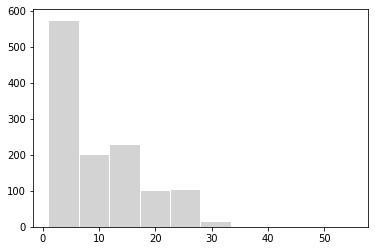

In [64]:
# Гистограмма
#rcParams['figure.figsize']= 4.5,5
hist_info = plt.hist(o_df['Этажность'], ec='white', color='lightgrey')
plt.show()

In [65]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.relplot(
    x='Регион', 
    y='Цена', 
    data=o_df, 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');